In [12]:
library(pheatmap)
library(ggplot2)
library(VennDiagram)
library(RColorBrewer)
library(matrixStats)
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization
library(tidyverse)
library(dplyr)

In [9]:
setwd("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/quest_to_upload/proteins/OrthoFinder/Results_May06/")

,B_violaceus,B_leachii,B_schlosseri,H_roretzi,H_aurantiun,M_oculata,M_occidentalis,P_fumigata,P_mammillata,C_savignyi,O_dioica
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
N8.HOG0000000,0,0,2,0,0,0,0,0,0,0,0
N8.HOG0000001,0,1,1,0,0,0,0,0,0,0,0
N8.HOG0000002,0,0,3,0,0,0,0,0,0,0,0
N8.HOG0000003,0,1,2,0,0,0,0,0,0,0,0
N8.HOG0000004,0,0,1,0,0,0,0,0,0,0,0
N8.HOG0000005,1,1,2,0,0,0,0,0,0,0,0


[1] 18986    11

Saving 6.67 x 6.67 in image



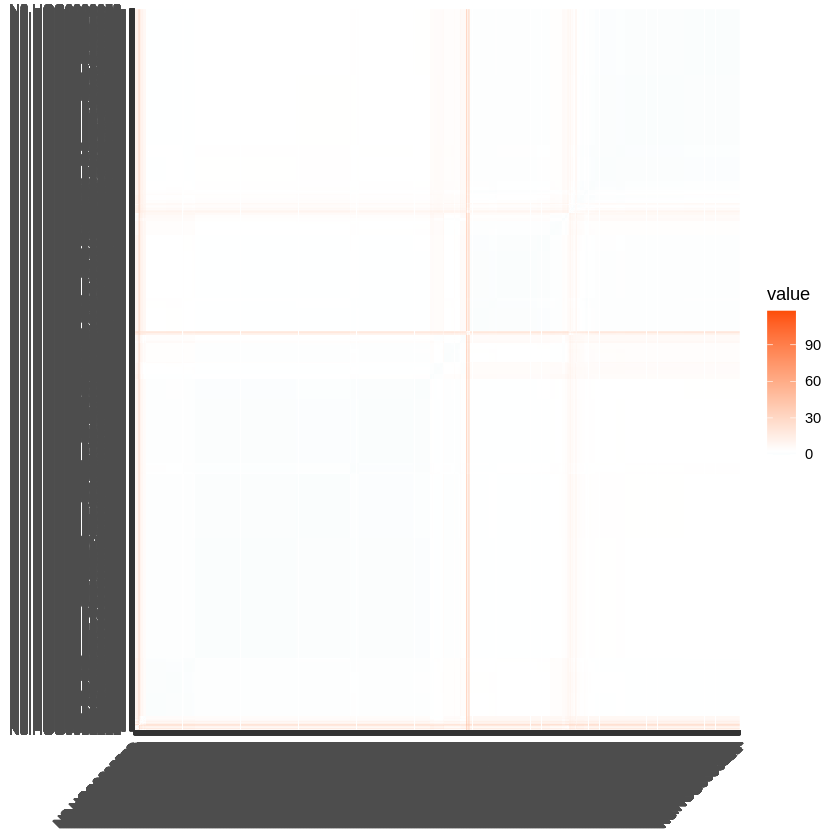

Saving 6.67 x 6.67 in image



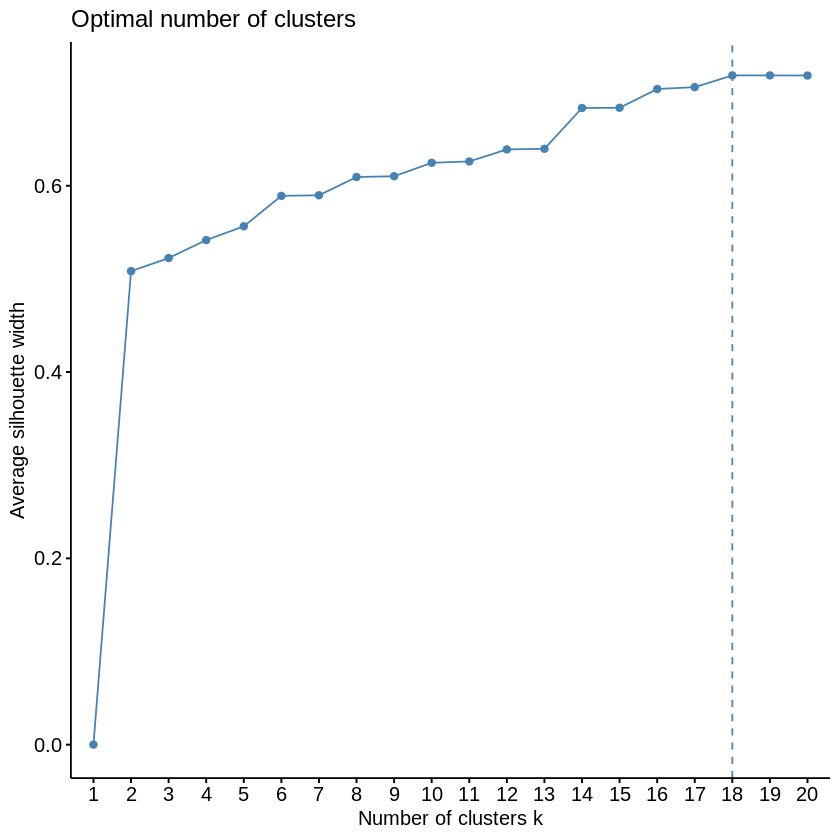

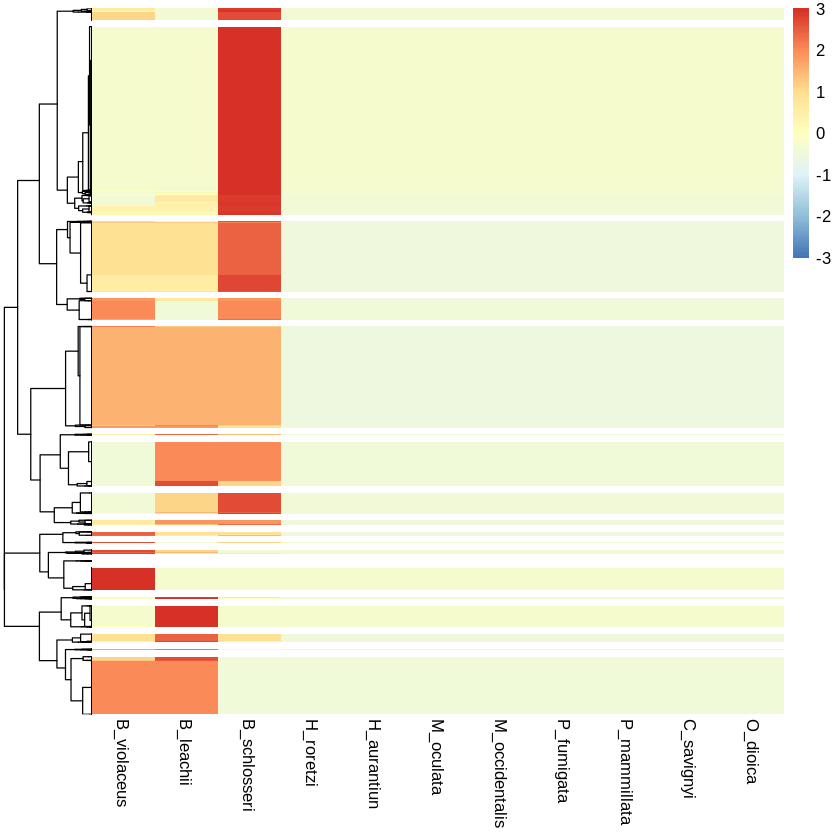

In [30]:
# read in data frame
hog_0_gene_cnts <- read.table("Phylogenetic_Hierarchical_Orthogroups/N8.GeneCount.csv", 
                              sep="\t", 
                              header=TRUE)


# clean data frame so HOG by counts
hog_0 <- hog_0_gene_cnts %>% 
    as_tibble() %>% 
    select(!Gene.Tree.Parent.Clade) %>%
    select(!OG) %>%
    select(HOG, B_violaceus, B_leachii, B_schlosseri, H_roretzi, H_aurantiun, M_oculata, M_occidentalis, P_fumigata, P_mammillata, C_savignyi, O_dioica) %>%
    column_to_rownames("HOG")



head(hog_0)
dim(hog_0)

# HOG counts as matrix (HOGxSpp.)
hog_0_mat <- hog_0 %>%
    #select(B_violaceus, B_leachii, B_schlosseri, H_roretzi, H_aurantiun) %>%
    #sample_n(100) %>%
    as.matrix()


# scale counts values to non-arbitrary values (rows now comparable)
df <- scale(hog_0_mat)

# calc euclidean distance
distance <- get_dist(df)

# visualize euc distance
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/EucDistanceFvisDist_N8.pdf")

# visualize and identify optimal silhouette clusters
fviz_nbclust(df, hcut, method = "silhouette", k.max = 20, print.summary=True)
ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/SilhoetteScoreNbclust_N8.pdf")



# Simple pheatmap for QC, figure one below
pheatmap(hog_0_mat,
                show_rownames=F, 
                cluster_cols=F, 
                cluster_rows=T, 
                cutree_rows=19,
                scale="row",
                border_color=TRUE,
                fontsize_row = 5)



looks like 18 is the optimial cluster number

In [114]:
num_clusters <- 18
# # graph heatmap
# Pheatmap without annotations
heat_out <- pheatmap(hog_0_mat,
                show_rownames=T, 
                cluster_cols=F, 
                cluster_rows=T, 
                cutree_rows=num_clusters,
                scale="row",
                border_color=TRUE,
                # cellheight=1, cellwidth = 1,
                filename="/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/GeneCount_pheatmap_N8.pdf")




# Get clusters 
clusters <- sort(cutree(heat_out$tree_row, k = num_clusters))

#ann %>% filter(clusters == 1)
#clusters

clusters_tb <- as_tibble(as.matrix(clusters), rownames = NA)


clusters_tb <- clusters_tb %>% 
    rename(Cluster='V1') %>% 
    rownames_to_column('HOG')

head(clusters_tb)

# Cluster Matrix
write_tsv(clusters_tb, "/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/tables/GeneCount_HOGclusters_N8.txt")

# Annotation matrix for pheatmap with clusters marked
clusters_ann <- clusters_tb %>% column_to_rownames("HOG")
clusters_ann$Cluster <- as.character(clusters_ann$Cluster)

# Final pheatmap with clusters labelled
heat_out_ann <- pheatmap(hog_0_mat,
                show_rownames=F, 
                cluster_cols=F, 
                cluster_rows=T, 
                cutree_rows=num_clusters,
                scale="row",
                border_color=TRUE,
                annotation_row=clusters_ann,
                filename="/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/GeneCount_pheatmapAnnotated_N8.pdf")



#clusters_tb %>% filter(Cluster == 7)#filter(HOG == "N8.HOG0000040")

HOG,Cluster
<chr>,<int>
N8.HOG0000000,1
N8.HOG0000002,1
N8.HOG0000004,1
N8.HOG0000007,1
N8.HOG0000008,1
N8.HOG0000011,1


Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in Q6766 / R6766C17: got 'iSDY_1059.SDY_0281'”
New names:
* `Seed ortholog` -> Seed.ortholog
* `e-value` -> e.value
* `best tax lvl` -> best.tax.lvl
* `GO terms` -> GO.terms
* `EC number` -> EC.number
* ...



Query,Seed.ortholog,e.value,score,best.tax.lvl,Preferred_name,GO.terms,EC.number,KEGG.KO,KEGG.pathway,⋯,KEGG.rclass,BRITE,KEGG.TC,CAZy,BiGG.reaction,annot.lvl,matching.OGs,Best.OG,COG.cat,description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
Bv.00g000010.m01.polypeptide,7719.XP_009858677.1,3.5e-27,128.6,Bilateria,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,Metazoa,"2CMP4@1,2QR56@2759,39VQX@33154,3BR69@33208,3D755@33213",NA|NA|NA,S,Pao retrotransposon peptidase
Bv.00g000030.m01.polypeptide,244447.XP_008332912.1,1.5e-34,152.9,Actinopterygii,DUSP12,"GO:0001932,GO:0001933,GO:0003674,GO:0003824,GO:0004721,GO:0004725,GO:0005488,GO:0005515,GO:0005575,GO:0005622,GO:0005623,GO:0005634,GO:0005737,GO:0006109,GO:0006464,GO:0006469,GO:0006470,GO:0006793,GO:0006796,GO:0006807,GO:0008138,GO:0008150,GO:0008152,GO:0008270,GO:0009892,GO:0009893,GO:0009966,GO:0009968,GO:0009987,GO:0010562,GO:0010563,GO:0010605,GO:0010646,GO:0010648,GO:0010675,GO:0010676,GO:0010906,GO:0016311,GO:0016787,GO:0016788,GO:0016791,GO:0019220,GO:0019222,GO:0019538,GO:0019899,GO:0019900,GO:0023051,GO:0023057,GO:0031323,GO:0031324,GO:0031325,GO:0031399,GO:0031400,GO:0032268,GO:0032269,GO:0032872,GO:0032873,GO:0033131,GO:0033133,GO:0033673,GO:0033674,GO:0035335,GO:0036211,GO:0042325,GO:0042326,GO:0042327,GO:0042578,GO:0043085,GO:0043086,GO:0043167,GO:0043169,GO:0043170,GO:0043226,GO:0043227,GO:0043229,GO:0043231,GO:0043405,GO:0043407,GO:0043408,GO:0043409,GO:0043412,GO:0043506,GO:0043508,GO:0043549,GO:0044092,GO:0044093,GO:0044237,GO:0044238,GO:0044260,GO:0044267,GO:0044424,GO:0044464,GO:0045859,GO:0045913,GO:0045936,GO:0045937,GO:0046328,GO:0046329,GO:0046872,GO:0046914,GO:0048518,GO:0048519,GO:0048522,GO:0048523,GO:0048583,GO:0048585,GO:0050789,GO:0050790,GO:0050794,GO:0051171,GO:0051172,GO:0051174,GO:0051246,GO:0051248,GO:0051338,GO:0051347,GO:0051348,GO:0060255,GO:0062012,GO:0065007,GO:0065009,GO:0070302,GO:0070303,GO:0071704,GO:0071900,GO:0071901,GO:0080090,GO:0080134,GO:0080135,GO:0140096,GO:1901564,GO:1902531,GO:1902532,GO:1903299,GO:1903301","3.1.3.16,3.1.3.48",ko:K14819,NA,⋯,NA,"ko00000,ko01000,ko01009,ko03009",NA,NA,NA,Metazoa,"38DF8@33154,3BE7W@33208,3CSN0@33213,4825F@7711,493DQ@7742,4A0QF@7898,COG2453@1,KOG1716@2759",NA|NA|NA,V,dual specificity


Saving 6.67 x 6.67 in image



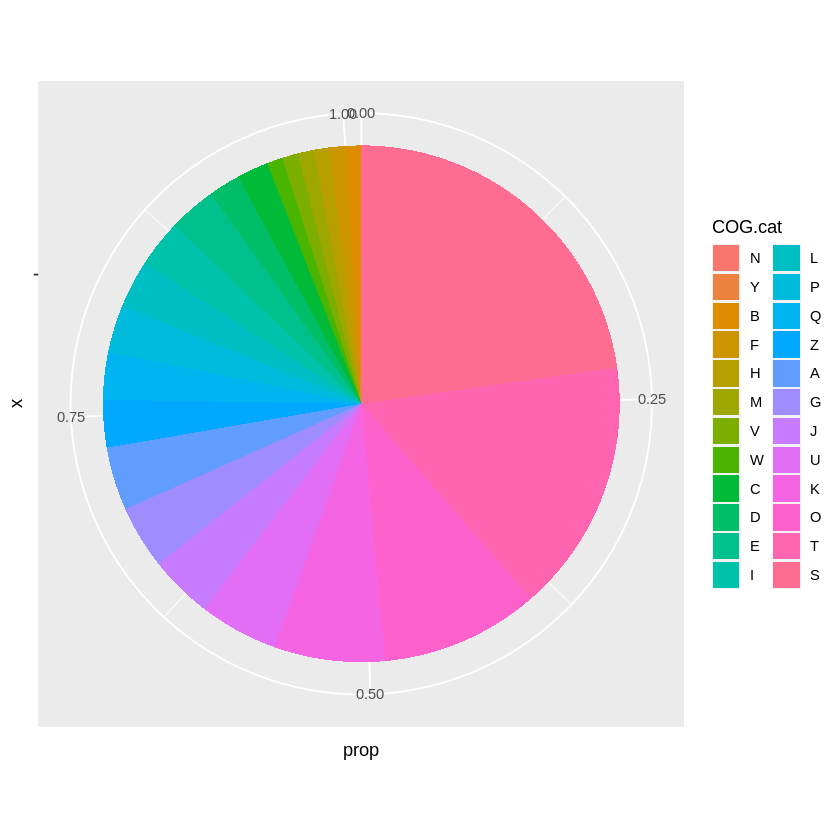

Saving 6.67 x 6.67 in image



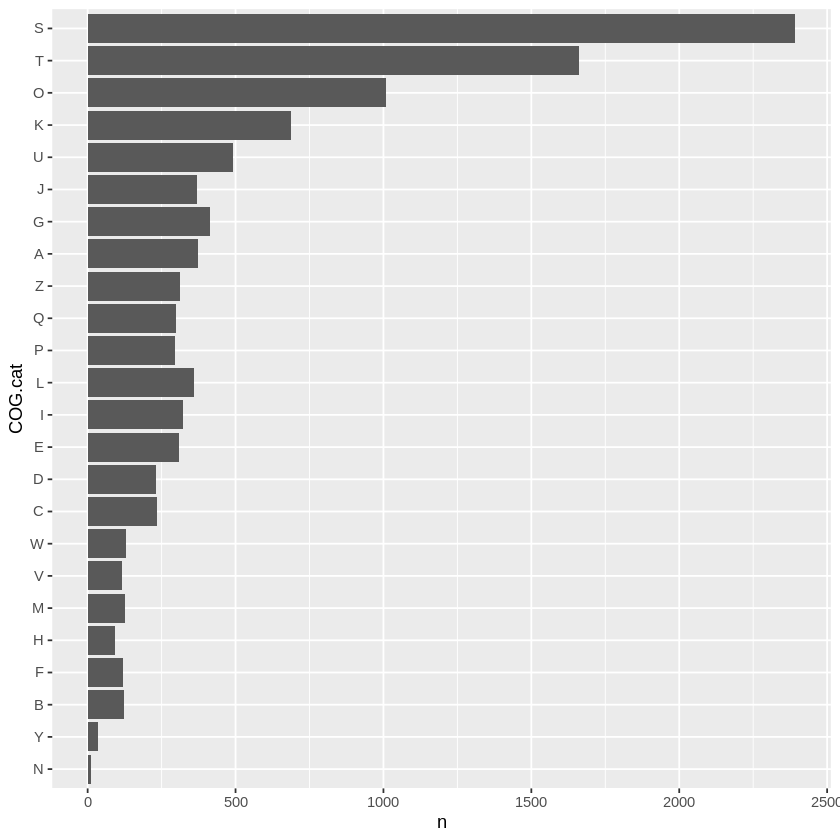

In [115]:

library(readxl)
library(forcats)

# Load in EggNog mapping data
eggnog <- read_excel("../../../Bviol.eggnog.v2_annotation_04082021.xlsx", skip = 4, .name_repair = "universal")

head(eggnog, 2)


# Intermediate check for Categories
df <- eggnog %>% select(COG.cat) %>% 
    drop_na() %>%
    separate_rows(COG.cat, sep="") %>%
    filter(COG.cat != "") %>%
    count(COG.cat) %>% 
    #group_by(COG.cat) %>% 
    mutate(prop = round(n/sum(n), 2)) %>% 
    arrange(desc(prop)) %>%
    mutate(COG.cat = fct_reorder(COG.cat, prop))


# High level check of categories

# COG Pie Chart
ggplot(df, aes(x = "", y = prop, fill = COG.cat)) +
  geom_col() +
  coord_polar(theta = "y")

ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/COGPie_N8.pdf")

# COG Bar Chart
ggplot(df, aes(x = COG.cat, y=n)) + 
  geom_bar(stat = "identity") +
  coord_flip()

ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/COGBar_N8.pdf")


[1] 11942    24

HOG           B_violaceus                   Cluster Seed.ortholog           
1 N8.HOG0000005 Bv.00g105200.m01.polypeptide  4       13735.ENSPSIP00000019166
2 N8.HOG0000006 Bv.00g014470.m01.polypeptide  5       NA                      
3 N8.HOG0000006  Bv.00g036700.m01.polypeptide 5       NA                      
4 N8.HOG0000009 Bv.00g004040.m01.polypeptide  4       7719.XP_002121464.3     
5 N8.HOG0000010 Bv.00g101360.m01.polypeptide  6       7739.XP_002613400.1     
6 N8.HOG0000012 Bv.00g029120.m01.polypeptide  5       7719.XP_009862101.1     
  e.value score best.tax.lvl Preferred_name
1 2.8e-13 81.6  Testudines   NA            
2 NA      NA    NA           NA            
3 NA      NA    NA           NA            
4 1.8e-39 170.2 Chordata     ANGPT1        
5 1.3e-70 275.4 Chordata     ANGPTL1       
6 2.8e-77 295.4 Chordata     NA            
  GO.terms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Warning message:
“Values from `KEGG.KO` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(Cluster) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,4,ko04360,Axon guidance,43/1012,83/3471,9.698708e-06,3.181176e-03,2.970867e-03,K05104/K05105/K05106/K05108/K05110/K05111/K05112/K05113/K04515/K06842/K04393/K05725/K00444/K07528/K05719/K04514/K17388/K06276/K04348/K04371/K01116/K05859/K06838/K06839/K06850/K06619/K02649/K04966/K04969/K04352/K05766/K07532/K07523/K16351/K06820/K07527/K06272/K04366/K06840/K07525/K05099/K06093/K00408,43
2,4,ko05205,Proteoglycans in cancer,46/1012,98/3471,1.198880e-04,1.966163e-02,1.836179e-02,K05692/K04515/K04393/K09295/K04361/K05083/K05084/K05085/K01365/K05725/K00444/K05087/K05762/K05763/K06278/K05719/K04514/K17388/K06276/K04451/K04371/K05730/K03258/K01116/K05859/K01398/K02649/K12823/K10380/K07532/K02235/K02432/K03685/K05760/K04365/K04366/K08845/K04503/K04688/K09593/K05099/K02187/K00182/K00408/K00572/K06497,46
3,7,ko03010,Ribosome,40/851,94/3471,7.551659e-05,2.454289e-02,2.392683e-02,K02902/K02898/K02991/K02940/K02892/K02888/K02877/K02938/K02989/K02881/K02992/K02868/K02916/K02997/K02906/K02929/K02875/K02953/K02876/K02867/K02896/K02964/K02886/K02995/K02865/K02958/K02926/K02950/K02918/K02899/K02935/K02921/K02962/K02890/K02872/K02943/K02954/K02956/K02923/K02959,40
4,8,ko00601,Glycosphingolipid biosynthesis - lacto and neolacto series,4/18,12/3471,2.444693e-07,8.067487e-06,7.720083e-06,K00716/K03663/K07633/K07634,4
5,8,ko00513,Various types of N-glycan biosynthesis,3/18,27/3471,3.170353e-04,5.231083e-03,5.005821e-03,K00736/K00753/K14464,3
6,1,ko05146,Amoebiasis,9/178,30/3471,1.126364e-05,2.937512e-03,2.760397e-03,K06461/K13963/K06240/K04634/K04635/K05636/K06243/K05717/K02580,9


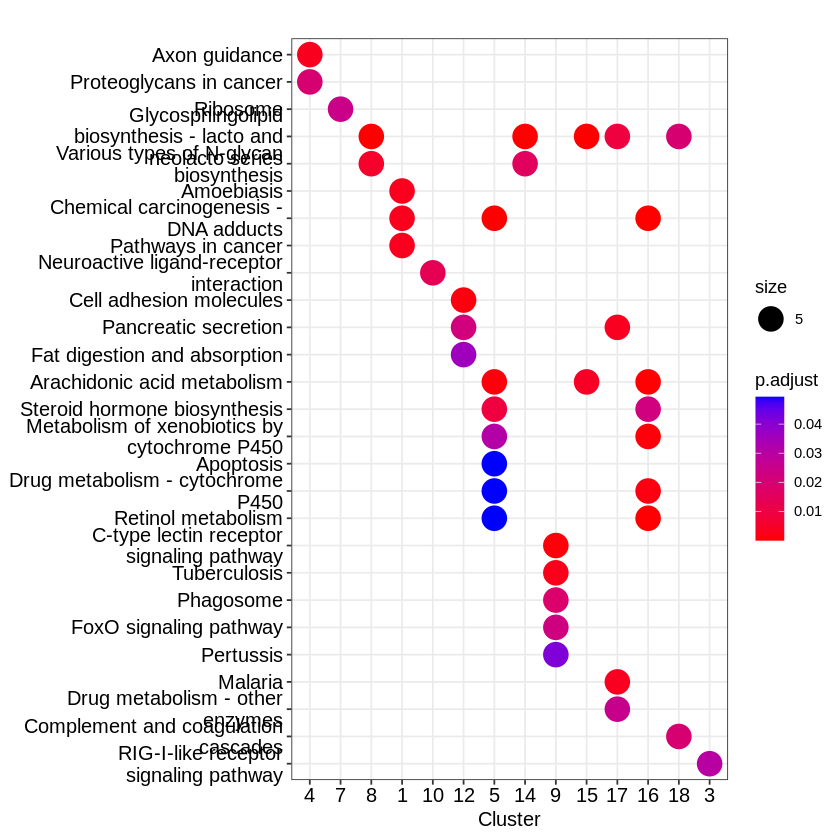

Saving 6.67 x 6.67 in image



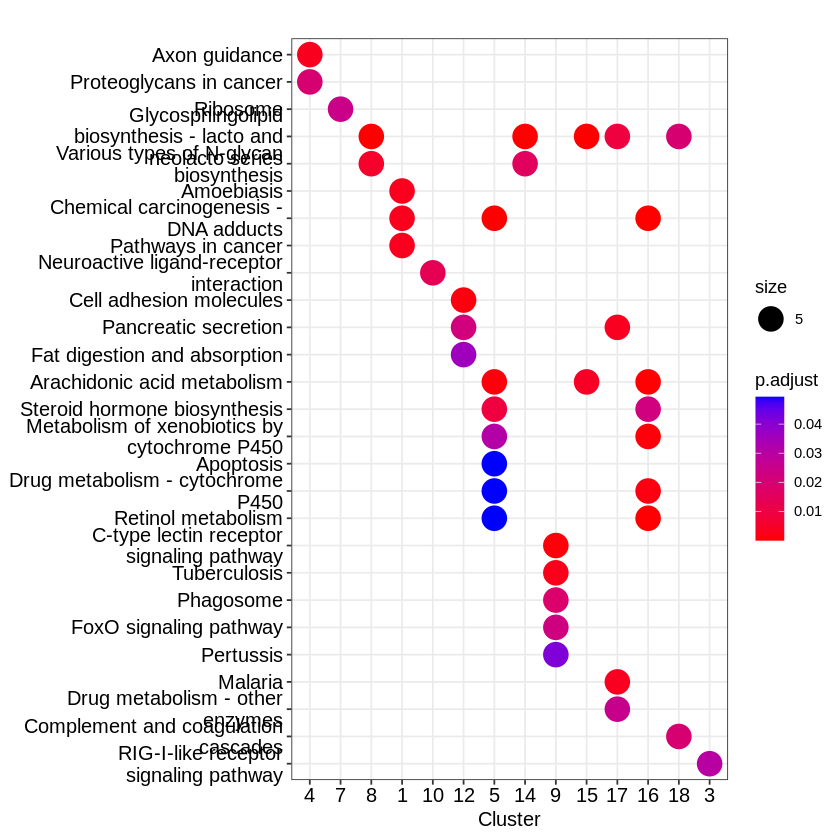

In [116]:
# Aggregate functional, annotation, and cluster data
gene2cluster <- read.table("Phylogenetic_Hierarchical_Orthogroups/N8.tsv", 
                              sep="\t", 
                              header=TRUE) %>% 
    select(HOG, B_violaceus) %>% 
    right_join(., clusters_tb, by = c("HOG" = "HOG")) %>% 
    separate_rows(B_violaceus, sep=",") %>% 
    filter(B_violaceus != "") %>%
    left_join(., eggnog, by = c("B_violaceus" = "Query"))

dim(gene2cluster)

head(gene2cluster)

write_tsv(gene2cluster, "/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/tables/Gene2Cluster2NOG_N8.txt")


# START KEGG ANALYSIS
library(clusterProfiler)


# kegg terms per gene that were clustered into selected HOGs
kegg_background <- eggnog%>% 
    select(KEGG.KO) %>% 
    separate_rows(KEGG.KO, sep=",") %>%
    separate_rows(KEGG.KO, sep=":") %>%
    filter(!KEGG.KO == "ko") %>%
    drop_na() %>% 
    select(KEGG.KO) %>% pluck(1) 


# get KEGG KO (KEGG orthology) terms from gene2cluster df
kegg_terms <- gene2cluster %>% 
    select(Cluster, KEGG.KO) %>% 
    separate_rows(KEGG.KO, sep=",") %>%
    separate_rows(KEGG.KO, sep=":") %>%
    filter(!KEGG.KO == "ko") %>%
    drop_na() %>% 
    pivot_wider(names_from = Cluster, values_from = KEGG.KO) %>%
    map(pluck, 1) # as nested list

# KEGG Term enrichment analysis 
ck <- compareCluster(geneCluster = kegg_terms, 
    fun = enrichKEGG, 
    organism = 'ko',
    universe = kegg_background,
    pvalueCutoff = 0.05)

head(ck)

# visualize dotplot top kegg terms
kegg_plot<- dotplot(ck, size = "Count", label_format = 40, font.size = 10)

kegg_plot
ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/KEGGEnrichment_N8.pdf")



In [206]:
head(ck, 100)

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,4,ko04360,Axon guidance,43/1012,83/3471,9.698708e-06,3.181176e-03,2.970867e-03,K05104/K05105/K05106/K05108/K05110/K05111/K05112/K05113/K04515/K06842/K04393/K05725/K00444/K07528/K05719/K04514/K17388/K06276/K04348/K04371/K01116/K05859/K06838/K06839/K06850/K06619/K02649/K04966/K04969/K04352/K05766/K07532/K07523/K16351/K06820/K07527/K06272/K04366/K06840/K07525/K05099/K06093/K00408,43
2,4,ko05205,Proteoglycans in cancer,46/1012,98/3471,1.198880e-04,1.966163e-02,1.836179e-02,K05692/K04515/K04393/K09295/K04361/K05083/K05084/K05085/K01365/K05725/K00444/K05087/K05762/K05763/K06278/K05719/K04514/K17388/K06276/K04451/K04371/K05730/K03258/K01116/K05859/K01398/K02649/K12823/K10380/K07532/K02235/K02432/K03685/K05760/K04365/K04366/K08845/K04503/K04688/K09593/K05099/K02187/K00182/K00408/K00572/K06497,46
3,7,ko03010,Ribosome,40/851,94/3471,7.551659e-05,2.454289e-02,2.392683e-02,K02902/K02898/K02991/K02940/K02892/K02888/K02877/K02938/K02989/K02881/K02992/K02868/K02916/K02997/K02906/K02929/K02875/K02953/K02876/K02867/K02896/K02964/K02886/K02995/K02865/K02958/K02926/K02950/K02918/K02899/K02935/K02921/K02962/K02890/K02872/K02943/K02954/K02956/K02923/K02959,40
4,8,ko00601,Glycosphingolipid biosynthesis - lacto and neolacto series,4/18,12/3471,2.444693e-07,8.067487e-06,7.720083e-06,K00716/K03663/K07633/K07634,4
5,8,ko00513,Various types of N-glycan biosynthesis,3/18,27/3471,3.170353e-04,5.231083e-03,5.005821e-03,K00736/K00753/K14464,3
6,1,ko05146,Amoebiasis,9/178,30/3471,1.126364e-05,2.937512e-03,2.760397e-03,K06461/K13963/K06240/K04634/K04635/K05636/K06243/K05717/K02580,9
7,1,ko05204,Chemical carcinogenesis - DNA adducts,7/178,19/3471,2.473730e-05,2.937512e-03,2.760397e-03,K07413/K07424/K17689/K17690/K17691/K17692/K04097,7
8,1,ko05200,Pathways in cancer,26/178,219/3471,3.376451e-05,2.937512e-03,2.760397e-03,K16060/K16061/K06240/K02599/K20994/K04504/K06230/K16797/K16798/K08735/K08732/K04634/K04635/K05636/K06243/K04447/K11217/K11218/K03068/K07201/K05638/K05097/K05717/K02580/K04469/K04451,26
9,10,ko04080,Neuroactive ligand-receptor interaction,20/310,86/3471,4.348800e-05,1.322035e-02,1.309218e-02,K04582/K04583/K04167/K04213/K04214/K04215/K04216/K04217/K04218/K04219/K04220/K04221/K04241/K04259/K04320/K05054/K05268/K08374/K08377/K04139,20


In [155]:
?dotplot

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

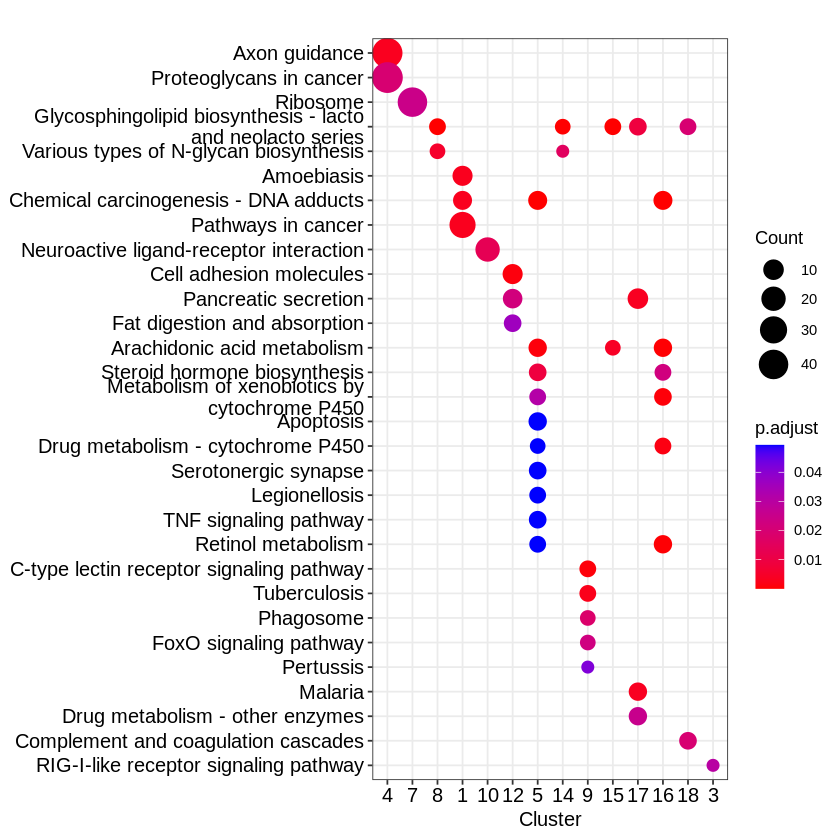

In [222]:
?dotplot

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

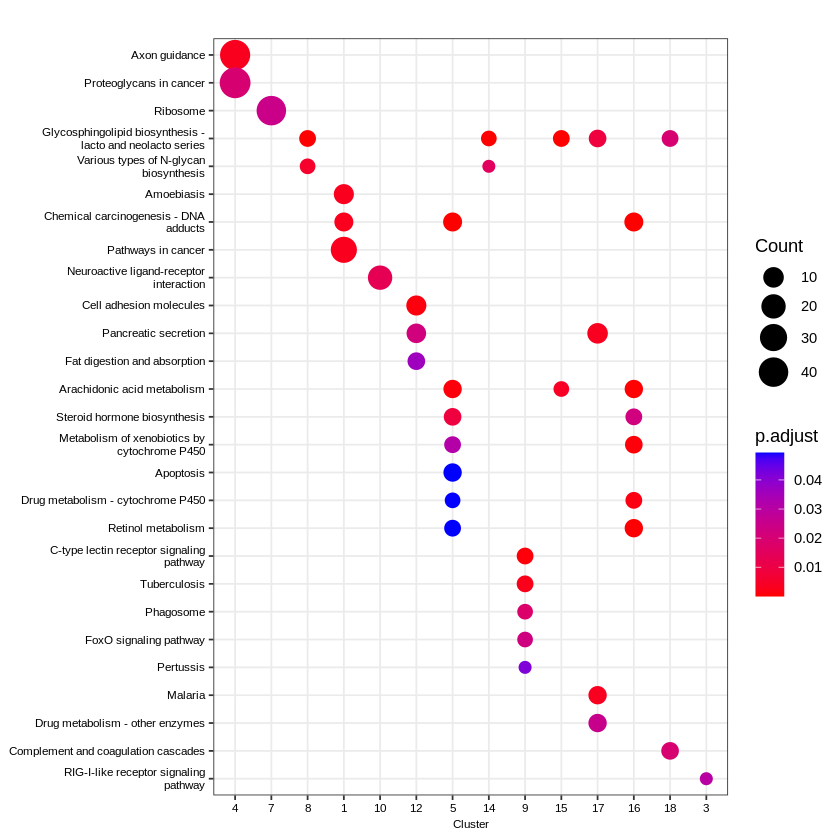

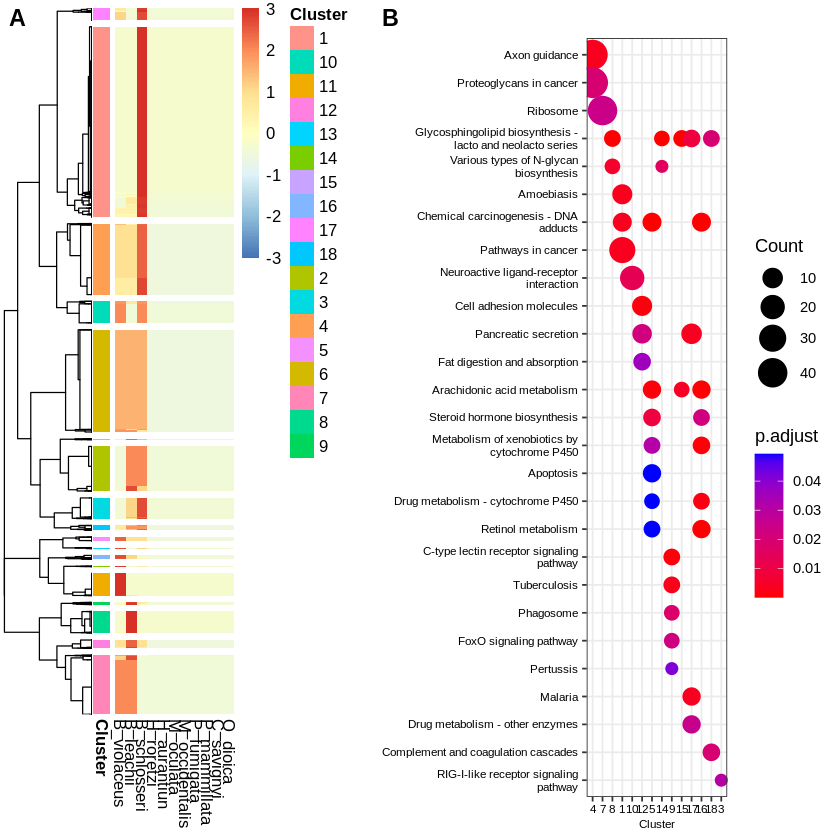

In [244]:
library(ggpubr)
library(cowplot)
kegg_plot<- dotplot(ck, size = "Count", label_format = 35, font.size=7)



# panel_fig <- ggarrange(heat_out_ann$gtable, kegg_plot,
#     labels = c("A", "B"),
#     ncol = 2, nrow = 1,
#     widths = c(1, 1),
#     font.label=list(color="black",size=9))

# panel_fig<-annotate_figure(panel_fig, top = text_grob("test", 
#                    color = "black", face = "bold", size = 1))

# panel_fig

# ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/AnnotatedHeat_and_KEGGPlot_N82.pdf",
#        panel_fig, width = 8, height = 5, units = "in")
# #visualize dotplot top kegg terms


test<-ggdraw(heat_out_ann$gtable)
testdot<-ggdraw(kegg_plot)

panel_fig <- plot_grid(test, testdot, labels = "AUTO", rel_widths = c(1, 1.25)) + theme_nothing(font_size=9)
# ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/AnnotatedHeat_and_KEGGPlot_N8.pdf",
#        panel_fig, width = 20, height = 10, units = "in")
ggsave("/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/AnnotatedHeat_and_KEGGPlot_N8.png",
       panel_fig, width = 8, height = 9, units = "in")


panel_fig

In [226]:
?ggdraw

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

In [213]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.5 (Maipo)

Matrix products: default
BLAS/LAPACK: /home/jsj3921/.conda/envs/jupyter-kernel-R/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] cowplot_1.1.1         ggpubr_0.4.0          clusterProfiler_4.2.1
 [4] readxl_1.3.1          forcats_0.5.1         stringr_1.4.0        
 [7] dplyr_1.0.8           purrr_0.3.4           readr_2.1.2          
[10] tidyr_1.2.0           tibble_3.1.6      

In [103]:
# KEGG dotplot s
dim(ck)
png(file="/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/GeneCount_N?_KEGGEnrich.png", width=650, height=900)
dotplot(ck, label_format = 35, showCategory=20, size = "Count")
dev.off()



[1] 41 10

png 
  2

In [ ]:
gene2cluster %>% filter(Cluster == 4) %>% 
    select(HOG, B_violaceus, Preferred_name, description) %>% 
    drop_na(Preferred_name) %>% arrange(Preferred_name) #%>% select(Preferred_name)



In [ ]:
go_terms <- gene2cluster %>% 
    select(Cluster, B_violaceus) %>%
    drop_na() %>% 
    pivot_wider(names_from = Cluster, values_from = B_violaceus) %>% 
    map(pluck, 1)
go_terms

In [215]:

# genes <- gene2cluster %>% 
#     select(Cluster, B_violaceus, GO.terms) %>%
#     drop_na(GO.terms) %>% separate_rows(GO.terms, sep=",") %>% relocate(GO.terms, B_violaceus) %>%
#     filter(Cluster == 18) %>% select(B_violaceus) %>% pluck(1)

# B. viol. gene names in names list
go_terms <- gene2cluster %>% 
    select(Cluster, B_violaceus) %>%
    drop_na() %>% 
    pivot_wider(names_from = Cluster, values_from = B_violaceus) %>% 
    map(pluck, 1)

# Term2Gene df for GO enrichment analysis
TERM2GENES <- eggnog %>% 
    select(Query, GO.terms) %>% 
    drop_na(GO.terms) %>% 
    separate_rows(GO.terms, sep=",") %>% 
    relocate(GO.terms)
# tmp %>% select(d)

# #     separate_rows(KEGG.KO, sep=":") %>%
# #     filter(!KEGG.KO == "ko") %>%
# #     drop_na() %>% 
# #     pivot_wider(names_from = Cluster, values_from = KEGG.KO) %>%
# #     map(pluck, 1) # as nested list

# head(go_gene_clusters)
head(TERM2GENES)

# e <- enricher(
#   genes,
#   pvalueCutoff = 0.05,
#   pAdjustMethod = "BH",
#   minGSSize = 10,
#   maxGSSize = 500,
#   qvalueCutoff = 0.2,
#   TERM2GENE = TERM2GENES,
#   TERM2NAME = NA
# )


# dotplot(e)
# Go term enrichment analysis using enricher
go_clusters <- compareCluster(geneCluster = go_terms, 
    fun = "enricher",
    pvalueCutoff = 0.05,
    pAdjustMethod = "BH",
    minGSSize = 10,
    maxGSSize = 500,
    qvalueCutoff = 0.2,
    TERM2GENE = TERM2GENES,
    TERM2NAME=NA)


png(file="/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/GeneCount_N?_GOEnrich.png", width=850, height=650)
dotplot(go_clusters, showCategory=500)
dev.off()



Warning message:
“Values from `B_violaceus` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(Cluster) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


GO.terms,Query
<chr>,<chr>
GO:0001932,Bv.00g000030.m01.polypeptide
GO:0001933,Bv.00g000030.m01.polypeptide
GO:0003674,Bv.00g000030.m01.polypeptide
GO:0003824,Bv.00g000030.m01.polypeptide
GO:0004721,Bv.00g000030.m01.polypeptide
GO:0004725,Bv.00g000030.m01.polypeptide


png 
  2

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,7,GO:0044391,GO:0044391,44/1224,135/7262,4.793665e-06,0.031897044,0.031897044,Bv.00g005230.m01.polypeptide/Bv.00g105510.m01.polypeptide/Bv.00g092390.m01.polypeptide/Bv.00g011330.m01.polypeptide/Bv.00g084720.m01.polypeptide/Bv.00g019650.m01.polypeptide/Bv.00g068140.m01.polypeptide/Bv.00g122270.m01.polypeptide/Bv.00g069020.m01.polypeptide/Bv.00g002470.m01.polypeptide/Bv.00g003740.m01.polypeptide/Bv.00g105760.m01.polypeptide/Bv.00g125610.m01.polypeptide/Bv.00g124000.m01.polypeptide/Bv.00g093860.m01.polypeptide/Bv.00g054650.m01.polypeptide/Bv.00g051540.m01.polypeptide/Bv.00g131910.m01.polypeptide/Bv.00g031940.m01.polypeptide/Bv.00g040970.m01.polypeptide/Bv.00g105800.m01.polypeptide/Bv.00g101880.m01.polypeptide/Bv.00g067780.m01.polypeptide/Bv.00g008690.m01.polypeptide/Bv.00g120050.m01.polypeptide/Bv.00g051770.m01.polypeptide/Bv.00g011540.m01.polypeptide/Bv.00g103310.m01.polypeptide/Bv.00g035380.m01.polypeptide/Bv.00g033890.m01.polypeptide/Bv.00g112650.m01.polypeptide/Bv.00g131820.m01.polypeptide/Bv.00g108150.m01.polypeptide/Bv.00g078750.m01.polypeptide/Bv.00g035800.m01.polypeptide/Bv.00g038860.m01.polypeptide/Bv.00g027390.m01.polypeptide/Bv.00g058100.m01.polypeptide/Bv.00g074390.m01.polypeptide/Bv.00g072920.m01.polypeptide/Bv.00g091390.m01.polypeptide/Bv.00g005830.m01.polypeptide/Bv.00g063980.m01.polypeptide/Bv.00g073840.m01.polypeptide,44
2,7,GO:0005840,GO:0005840,46/1224,150/7262,1.791739e-05,0.040994923,0.040994923,Bv.00g005230.m01.polypeptide/Bv.00g105510.m01.polypeptide/Bv.00g092390.m01.polypeptide/Bv.00g011330.m01.polypeptide/Bv.00g084720.m01.polypeptide/Bv.00g019650.m01.polypeptide/Bv.00g068140.m01.polypeptide/Bv.00g122270.m01.polypeptide/Bv.00g069020.m01.polypeptide/Bv.00g002470.m01.polypeptide/Bv.00g003740.m01.polypeptide/Bv.00g105760.m01.polypeptide/Bv.00g125610.m01.polypeptide/Bv.00g124000.m01.polypeptide/Bv.00g093860.m01.polypeptide/Bv.00g054650.m01.polypeptide/Bv.00g051540.m01.polypeptide/Bv.00g131910.m01.polypeptide/Bv.00g031940.m01.polypeptide/Bv.00g040970.m01.polypeptide/Bv.00g008570.m01.polypeptide/Bv.00g105800.m01.polypeptide/Bv.00g101880.m01.polypeptide/Bv.00g067780.m01.polypeptide/Bv.00g008690.m01.polypeptide/Bv.00g120050.m01.polypeptide/Bv.00g051770.m01.polypeptide/Bv.00g011540.m01.polypeptide/Bv.00g103310.m01.polypeptide/Bv.00g035380.m01.polypeptide/Bv.00g033890.m01.polypeptide/Bv.00g112650.m01.polypeptide/Bv.00g131820.m01.polypeptide/Bv.00g108150.m01.polypeptide/Bv.00g078750.m01.polypeptide/Bv.00g035800.m01.polypeptide/Bv.00g038860.m01.polypeptide/Bv.00g027390.m01.polypeptide/Bv.00g058100.m01.polypeptide/Bv.00g074390.m01.polypeptide/Bv.00g072920.m01.polypeptide/Bv.00g091390.m01.polypeptide/Bv.00g005830.m01.polypeptide/Bv.00g063980.m01.polypeptide/Bv.00g073840.m01.polypeptide/Bv.00g118050.m01.polypeptide,46
3,7,GO:0003735,GO:0003735,38/1224,116/7262,1.848283e-05,0.040994923,0.040994923,Bv.00g005230.m01.polypeptide/Bv.00g105510.m01.polypeptide/Bv.00g092390.m01.polypeptide/Bv.00g011330.m01.polypeptide/Bv.00g084720.m01.polypeptide/Bv.00g019650.m01.polypeptide/Bv.00g068140.m01.polypeptide/Bv.00g122270.m01.polypeptide/Bv.00g002470.m01.polypeptide/Bv.00g003740.m01.polypeptide/Bv.00g105760.m01.polypeptide/Bv.00g125610.m01.polypeptide/Bv.00g124000.m01.polypeptide/Bv.00g054650.m01.polypeptide/Bv.00g131910.m01.polypeptide/Bv.00g031940.m01.polypeptide/Bv.00g040970.m01.polypeptide/Bv.00g105800.m01.polypeptide/Bv.00g101880.m01.polypeptide/Bv.00g067780.m01.polypeptide/Bv.00g008690.m01.polypeptide/Bv.00g120050.m01.polypeptide/Bv.00g051770.m01.polypeptide/Bv.00g011540.m01.polypeptide/Bv.00g035380.m01.polypeptide/Bv.00g033890.m01.polypeptide/Bv.00g131820.m01.polypeptide/Bv.00g108150.m01.polypeptide/Bv.00g078750.m01.polypeptide/Bv.00g035800.m01.polypeptide/Bv.00g038860.m01.polypeptide/Bv.00g027390.m01.polypeptide/Bv.00g058100.m01.polypeptide/Bv.00g074390.m01.polypeptide/Bv.00g072920.m01.po

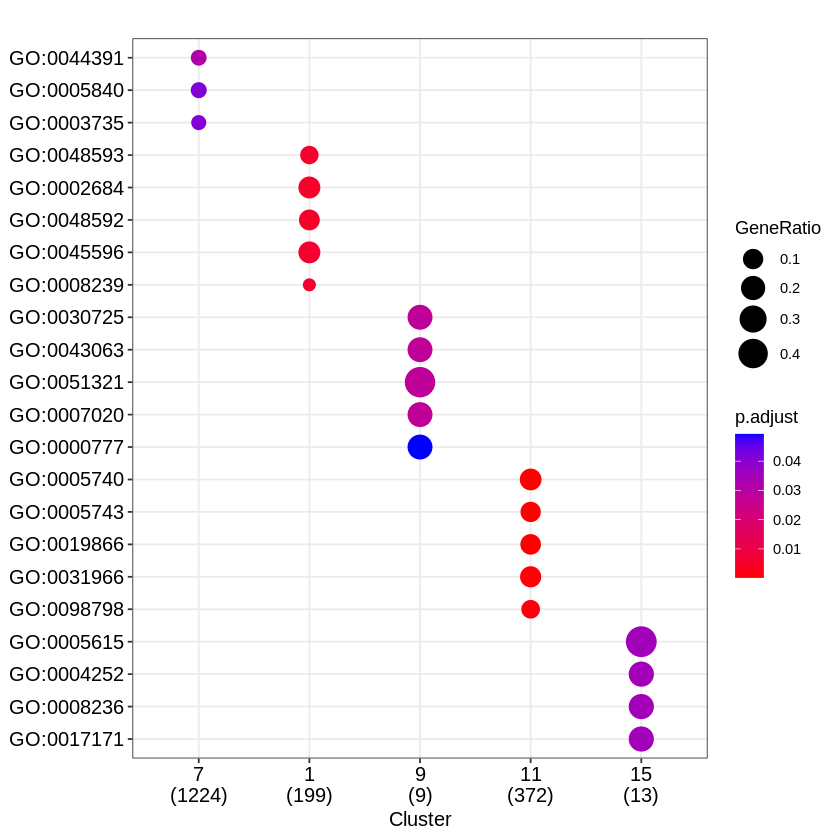

In [217]:


#png(file="/home/jsj3921/ascidians/Sumner2021_BviolaceusGenome/figures/GeneCount_N?_GOEnrich.png", width=850, height=650)
dotplot(go_clusters)
#dev.off()


head(go_clusters)



#
# Result of Comparing 18 gene clusters 
#
#.. @fun 	 enricher 
#.. @geneClusters 	List of 18
 $ 4 : chr [1:2344] "Bv.00g105200.m01.polypeptide" "Bv.00g004040.m01.polypeptide" "Bv.00g077960.m01.polypeptide" "Bv.00g036960.m01.polypeptide" ...
 $ 5 : chr [1:274] "Bv.00g014470.m01.polypeptide" " Bv.00g036700.m01.polypeptide" "Bv.00g029120.m01.polypeptide" " Bv.00g029110.m01.polypeptide" ...
 $ 6 : chr [1:3259] "Bv.00g101360.m01.polypeptide" "Bv.00g036450.m01.polypeptide" "Bv.00g044950.m01.polypeptide" "Bv.00g077680.m01.polypeptide" ...
 $ 7 : chr [1:2022] "Bv.00g046750.m01.polypeptide" "Bv.00g086690.m01.polypeptide" " Bv.00g006720.m01.polypeptide" "Bv.00g036460.m01.polypeptide" ...
 $ 8 : chr [1:53] "Bv.00g044130.m01.polypeptide" " Bv.00g049610.m01.polypeptide" " Bv.00g049690.m01.polypeptide" "Bv.00g089550.m01.polypeptide" ...
 $ 1 : chr [1:511] "Bv.00g006740.m01.polypeptide" " Bv.00g015170.m01.polypeptide" "Bv.00g129040.m01.polypeptide" "Bv.00g001800.m01.polypeptide" ...
 $ 9 : chr [1:2

#
# Result of Comparing 18 gene clusters 
#
#.. @fun 	 enricher 
#.. @geneClusters 	List of 18
 $ 4 : chr [1:2344] "Bv.00g105200.m01.polypeptide" "Bv.00g004040.m01.polypeptide" "Bv.00g077960.m01.polypeptide" "Bv.00g036960.m01.polypeptide" ...
 $ 5 : chr [1:274] "Bv.00g014470.m01.polypeptide" " Bv.00g036700.m01.polypeptide" "Bv.00g029120.m01.polypeptide" " Bv.00g029110.m01.polypeptide" ...
 $ 6 : chr [1:3259] "Bv.00g101360.m01.polypeptide" "Bv.00g036450.m01.polypeptide" "Bv.00g044950.m01.polypeptide" "Bv.00g077680.m01.polypeptide" ...
 $ 7 : chr [1:2022] "Bv.00g046750.m01.polypeptide" "Bv.00g086690.m01.polypeptide" " Bv.00g006720.m01.polypeptide" "Bv.00g036460.m01.polypeptide" ...
 $ 8 : chr [1:53] "Bv.00g044130.m01.polypeptide" " Bv.00g049610.m01.polypeptide" " Bv.00g049690.m01.polypeptide" "Bv.00g089550.m01.polypeptide" ...
 $ 1 : chr [1:511] "Bv.00g006740.m01.polypeptide" " Bv.00g015170.m01.polypeptide" "Bv.00g129040.m01.polypeptide" "Bv.00g001800.m01.polypeptide" ...
 $ 9 : chr [1:2

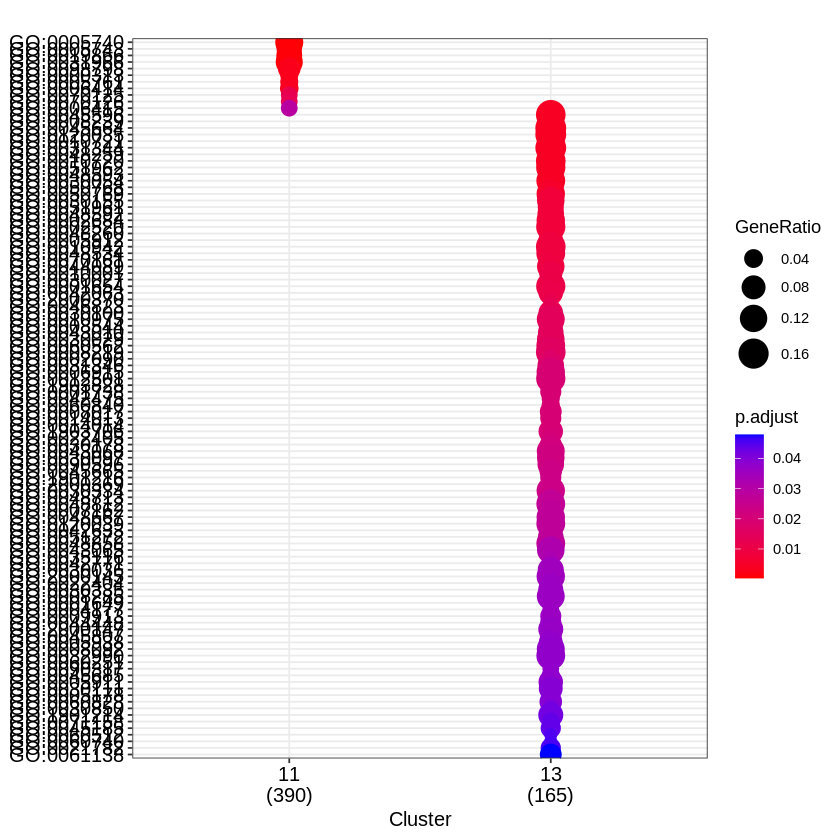

In [20]:
go_clusters
go_clusters
dotplot(go_clusters, showCategory=500)


In [ ]:

#head(df, 10)
#eggnog %>% select(Preferred_name, starts_with("K")) %>% drop_na()



#eggnog <- eggnog %>% relocate(Query, Preferred_name, description, starts_with("K"))

#head(eggnog)